### 1. **Linear Regression 1**


#### 1.1. **Getting Started**

The first item requires all numerical variables.

For this first Linear Regression model, we will compare two different approaches:

- droping the 'Species' variable;
- using it as a predictor.

The species is a categorical variable, but it is possible to convert it to a numerical variable. This is called label encoding.


In [1]:
# Append the path to useful directories
import sys
sys.path.append('../my_functions')

# Packages needed
from download_dataset import download_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Download and extract the dataset
fishcatch = download_dataset(data_file='fishcatch', extension='.tar.xz')

# Quick peek at the data
df = pd.read_csv(fishcatch)
df.head(3).style.background_gradient(cmap='viridis')

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.000000,23.200000,25.400000,30.000000,11.520000,4.020000
1,Bream,290.000000,24.000000,26.300000,31.200000,12.480000,4.305600
2,Bream,340.000000,23.900000,26.500000,31.100000,12.377800,4.696100


#### 1.2. **Droping the 'Species' variable**

In [2]:
# Including only the numeric columns
df_no_species = df.select_dtypes(include=['int64', 'float64'])
df_no_species.head(3).style.background_gradient(cmap='viridis')

,Weight,Length1,Length2,Length3,Height,Width
0,242.000000,23.200000,25.400000,30.000000,11.520000,4.020000
1,290.000000,24.000000,26.300000,31.200000,12.480000,4.305600
2,340.000000,23.900000,26.500000,31.100000,12.377800,4.696100


After dropping the 'Species' variable, we will split the data into training and testing sets, fit the model and evaluate it.


In [3]:
# Splitting the dataset into features and target variable
X = df_no_species.drop(columns=['Width'])
y = df_no_species['Width']

In [4]:
# Split the dataset into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [5]:
# Fitting the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [6]:
# R2 score of the training set
train_r2 = lr.score(X_train, y_train)
print(f'Training R²: {train_r2:.3f}')

Training R²: 0.908


The training set has a R2 score of 0.908, which is a good indication that the model is fitting the data well.

Later on, we have to check the performance of the model on the test set, that is, how well the model generalizes to new data.


In [7]:
# Where the model intercepts the y-axis
intercept = lr.intercept_
print(f'Intercept: {intercept}')

# The coefficients of the model
coef = lr.coef_
print(f'Coefficients: {coef}')

Intercept: 0.5969043404811023
Coefficients: [ 4.64755016e-04  5.47007918e-02  5.42651198e-01 -5.12709599e-01
  3.15229456e-01]


In [8]:
# Equation of the line
print(f"{y.name} = \n{intercept:.6f} ")
for i, j in zip(X.columns, coef):
    print(f"+ {i}*{j:.6f}")

Width = 
0.596904 
+ Weight*0.000465
+ Length1*0.054701
+ Length2*0.542651
+ Length3*-0.512710
+ Height*0.315229


As stated before, the 'Weight' variable seems to have a non-linear relationship with the 'Width' variable.

On the equation above, Weight has a low coefficient, which means that it has a low impact on the 'Width' variable, as expected.


In [9]:
# Testing the model
y_pred = lr.predict(X_test)
y_pred

array([3.3920807 , 1.81643417, 3.77141635, 4.04924146, 3.37995151,
       7.10660607, 1.50214956, 3.57561636, 3.95931017, 7.17062983,
       5.49424139, 6.39952394, 5.64251421, 3.8447136 , 6.01472525,
       6.90634663, 7.2544688 , 4.34969344, 4.15339403, 5.54028461,
       1.60434572, 5.88686605, 5.18926334, 4.97220208, 6.98873133,
       7.25165992, 3.76460772, 3.96621278, 1.43757461, 1.60429924,
       4.90779126, 2.89151563])

In [10]:
# Performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.17750811558193472
Root Mean Squared Error: 0.42131711997251514
Mean Absolute Error: 0.35725399527276325
R2 Score: 0.9494117660592509


In [11]:
# Save the results to a csv file
from save_results import save_results
save_results(mse, mae, r2, rmse, train_r2, 'Linear Regression 1: with no species')

Results saved successfully to "results.csv".


More information about the function below in [plot_regression.py](../my_functions/plot_regression.py).


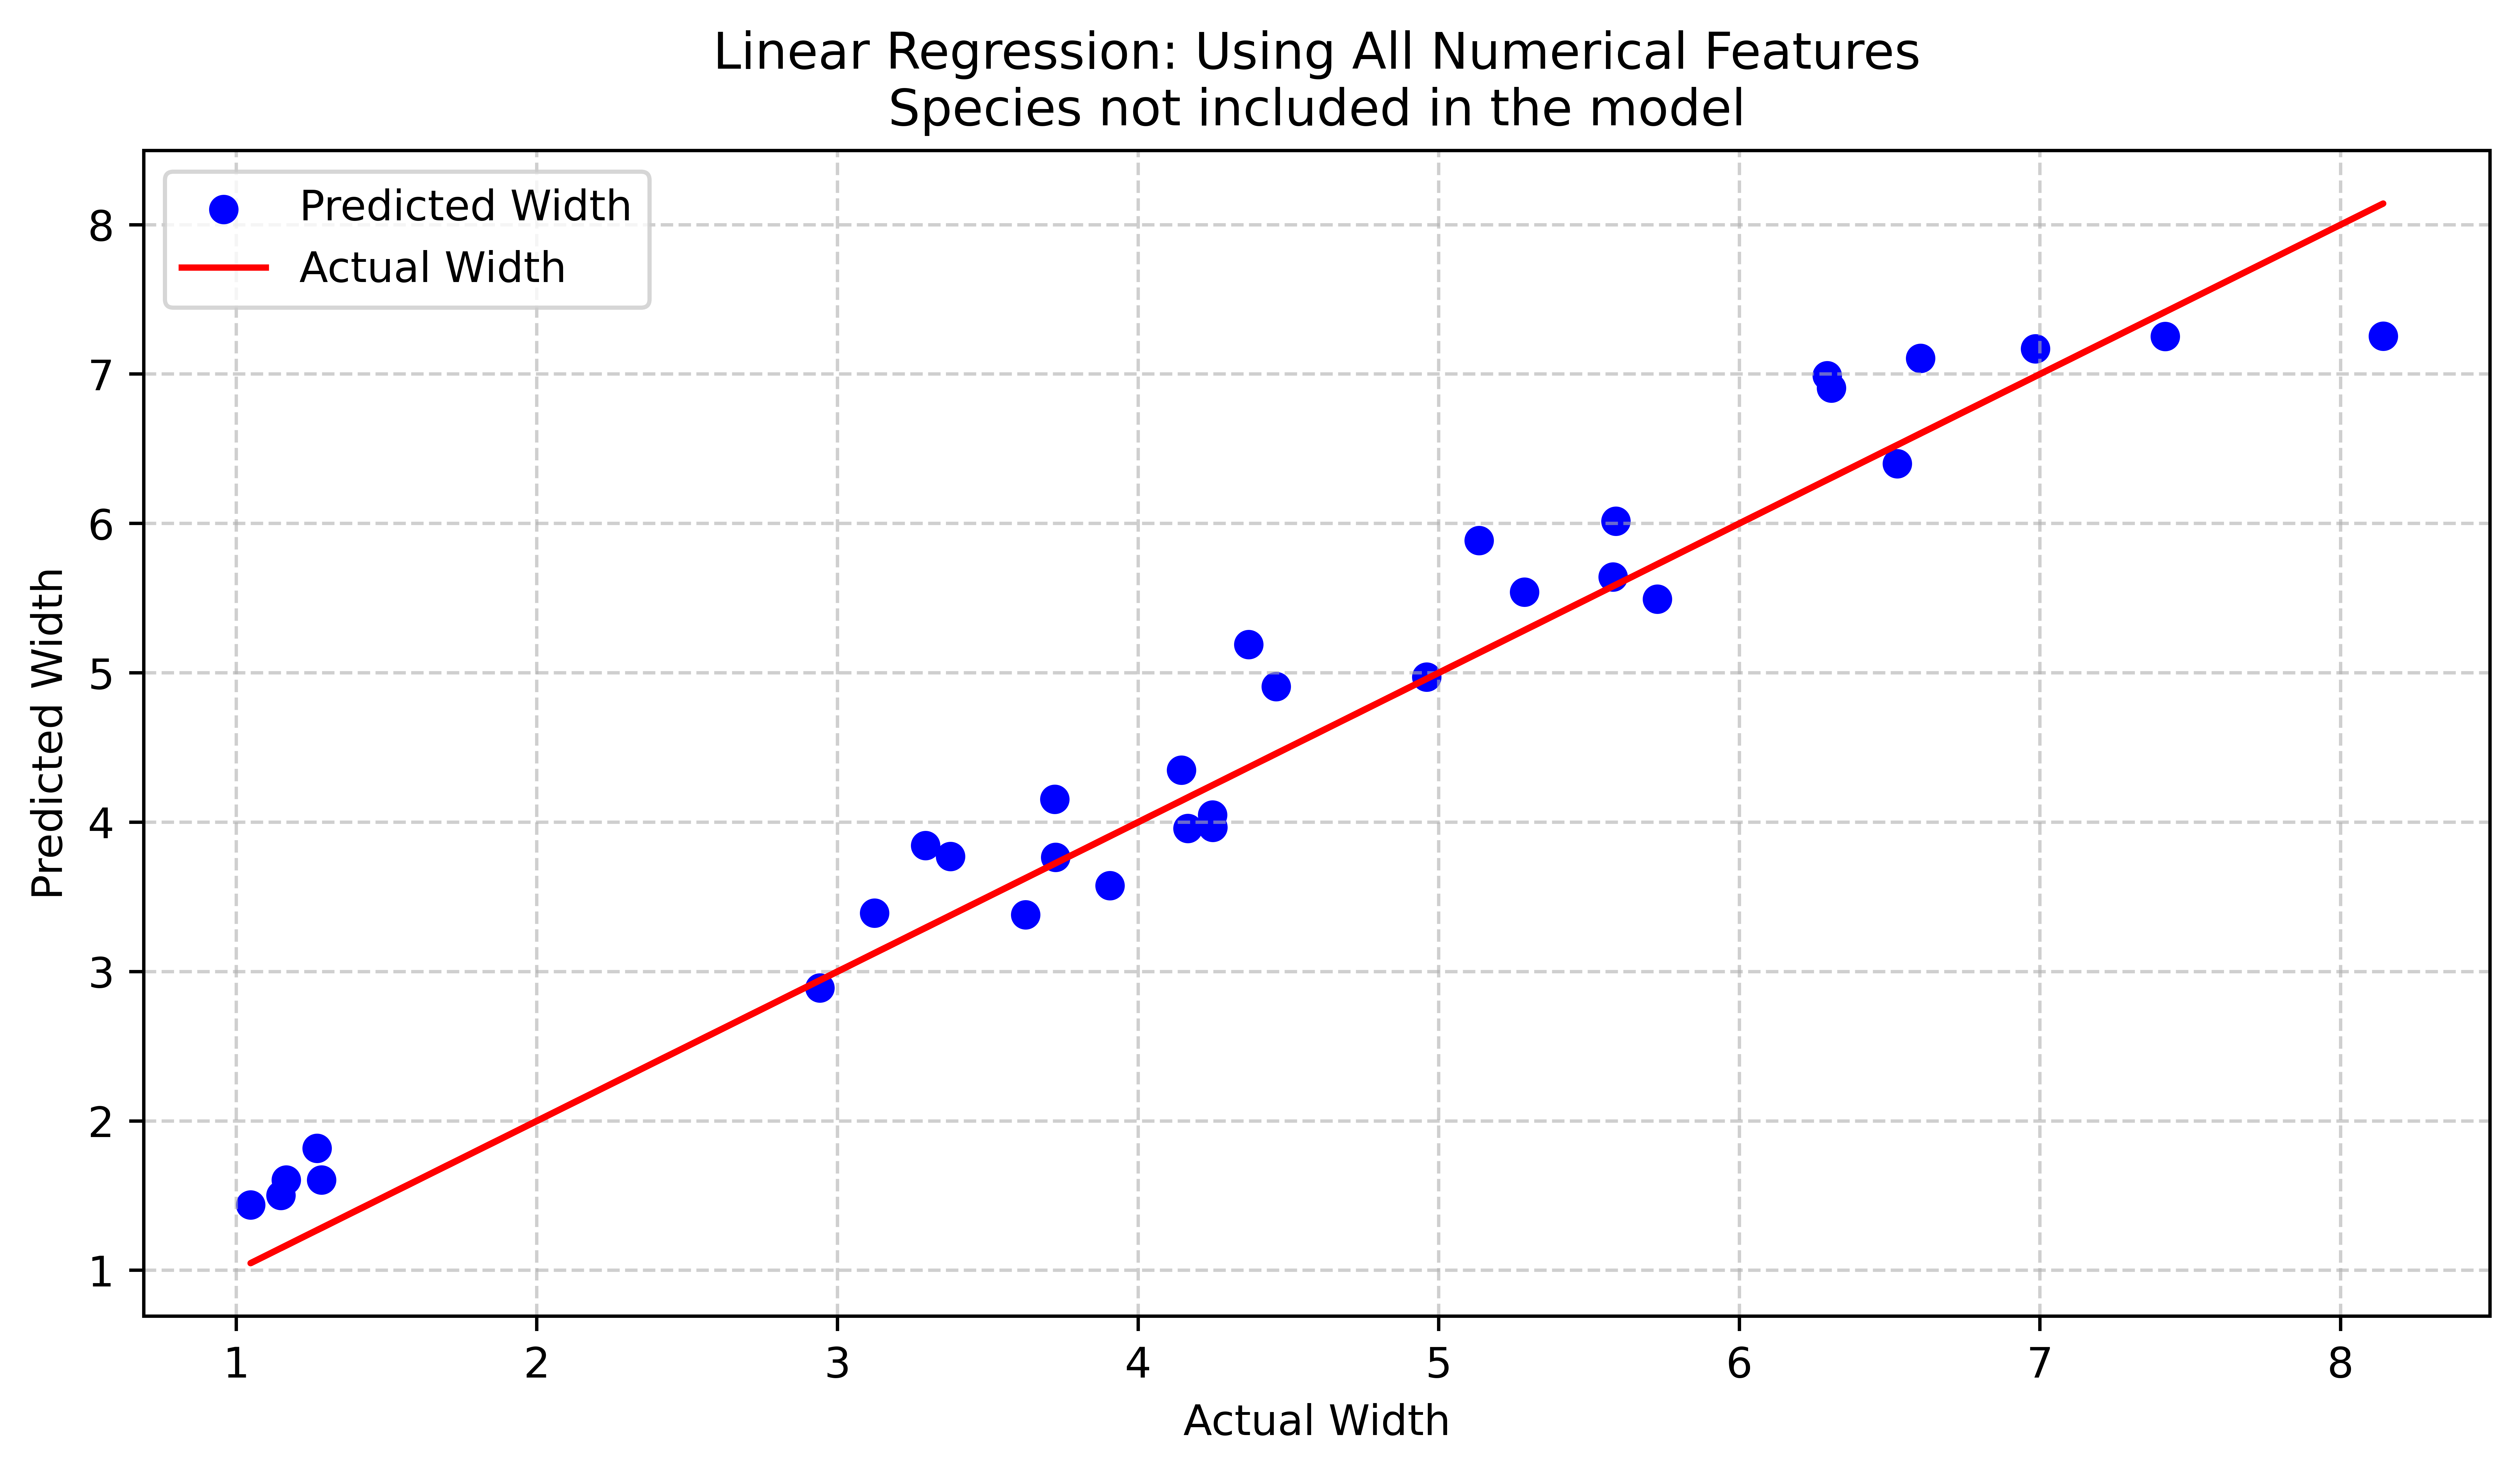

In [12]:
# Plotting the model
from plot_regression import plot_regression
plot_regression(
    y_test, y_pred,
    regression_type='Linear',
    title="Using All Numerical Features\nSpecies not included in the model")

The results achieved with this model are not bad, but we can try to improve it by using the 'Species' variable as a predictor.


#### 1.3. **Using the 'Species' variable**

The species are categorical variables, so encoding them is necessary. The class/method below is encoding the species using the OneHotEncoder from Scikit-learn.

What the OneHotEncoder does is to create a binary column for each category and returns a sparse matrix or dense array.


In [13]:
from sklearn.preprocessing import OneHotEncoder

# Encoding the Species column
encoder = OneHotEncoder()
encoder.handle_unknown = 'ignore'

# Turning the Species column into a numpy array with new columns
# for each species. 1: True, 0: False
species_encoded = encoder.fit_transform(df[['Species']])
species_encoded.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [14]:
# All the categories in the Species column
encoder.categories_

[array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
       dtype=object)]

In [15]:
# Combine the encoded species with the original dataset
encoder.get_feature_names_out()

df_output = pd.DataFrame(encoder.transform(df[['Species']]).toarray(),

                         columns=encoder.categories_[0].tolist(),

                         index=df.index)


df_with_species = pd.concat(
    [df_output, df.drop(columns=['Species'])], axis=1)

df_with_species.head(3).style.background_gradient(cmap='viridis')

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish,Weight,Length1,Length2,Length3,Height,Width
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,242.000000,23.200000,25.400000,30.000000,11.520000,4.020000
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,290.000000,24.000000,26.300000,31.200000,12.480000,4.305600
2,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,340.000000,23.900000,26.500000,31.100000,12.377800,4.696100


Combining the encoded species with the other variables, the dataset is ready to be split into training and test sets.


In [16]:
# Splitting the dataset into features and target variable
X = df_with_species.drop(columns=['Width'])
y = df_with_species['Width']

In [17]:
# Split the dataset into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [18]:
# Fitting the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
# R2 score of the training set
train_r2 = lr.score(X_train, y_train)
print(f'Training R²: {train_r2:.2f}')

Training R²: 0.96


The training set has a R2 score of 0.96, which is a good indication that the model is fitting the data well.

Later on, we have to check the performance of the model on the test set, that is, how well the model generalizes to new data.


In [20]:
# Where the model intercepts the y-axis
intercept = lr.intercept_
print(f'Intercept: {intercept}')

# The coefficients of the model
coef = lr.coef_
print(f'Coefficients: {coef}')

Intercept: -0.6277887708467631
Coefficients: [-1.72792322e+00 -7.45346722e-01  8.89626108e-01  4.28978529e-02
  3.50517699e-01  4.19406473e-01  7.70821811e-01  7.90346816e-05
  1.40719021e-01 -2.33739513e-01  1.55005460e-01  3.52235681e-01]


In [21]:
# Equation of the line
print(f"{y.name} = \n{intercept:.6f} ")
for i, j in zip(X.columns, coef):
    print(f"+ {i}*{j:.6f}")

Width = 
-0.627789 
+ Bream*-1.727923
+ Parkki*-0.745347
+ Perch*0.889626
+ Pike*0.042898
+ Roach*0.350518
+ Smelt*0.419406
+ Whitefish*0.770822
+ Weight*0.000079
+ Length1*0.140719
+ Length2*-0.233740
+ Length3*0.155005
+ Height*0.352236


In [22]:
# Testing the model
y_pred = lr.predict(X_test)
y_pred

array([3.09960238, 1.48922577, 3.45813866, 4.80864657, 3.48855886,
       7.06961231, 1.14266171, 3.98849405, 4.1398405 , 6.75980093,
       5.32457662, 7.2155638 , 5.55320117, 3.1576432 , 6.00587081,
       6.83217494, 7.39993754, 4.46792357, 4.28718434, 5.43513883,
       1.43479283, 5.70015439, 4.90461413, 5.14080819, 6.83603091,
       7.40090656, 3.89326903, 4.77236421, 1.09671327, 1.43478493,
       4.60700527, 2.89324918])

In [23]:
# Performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.12914695042492624
Root Mean Squared Error: 0.35937021360280574
Mean Absolute Error: 0.28157913037168114
R2 Score: 0.9631942679386125


In [24]:
save_results(mse, mae, r2, rmse, train_r2, 'Linear Regression 1: encoded species')

Results saved successfully to "results.csv".


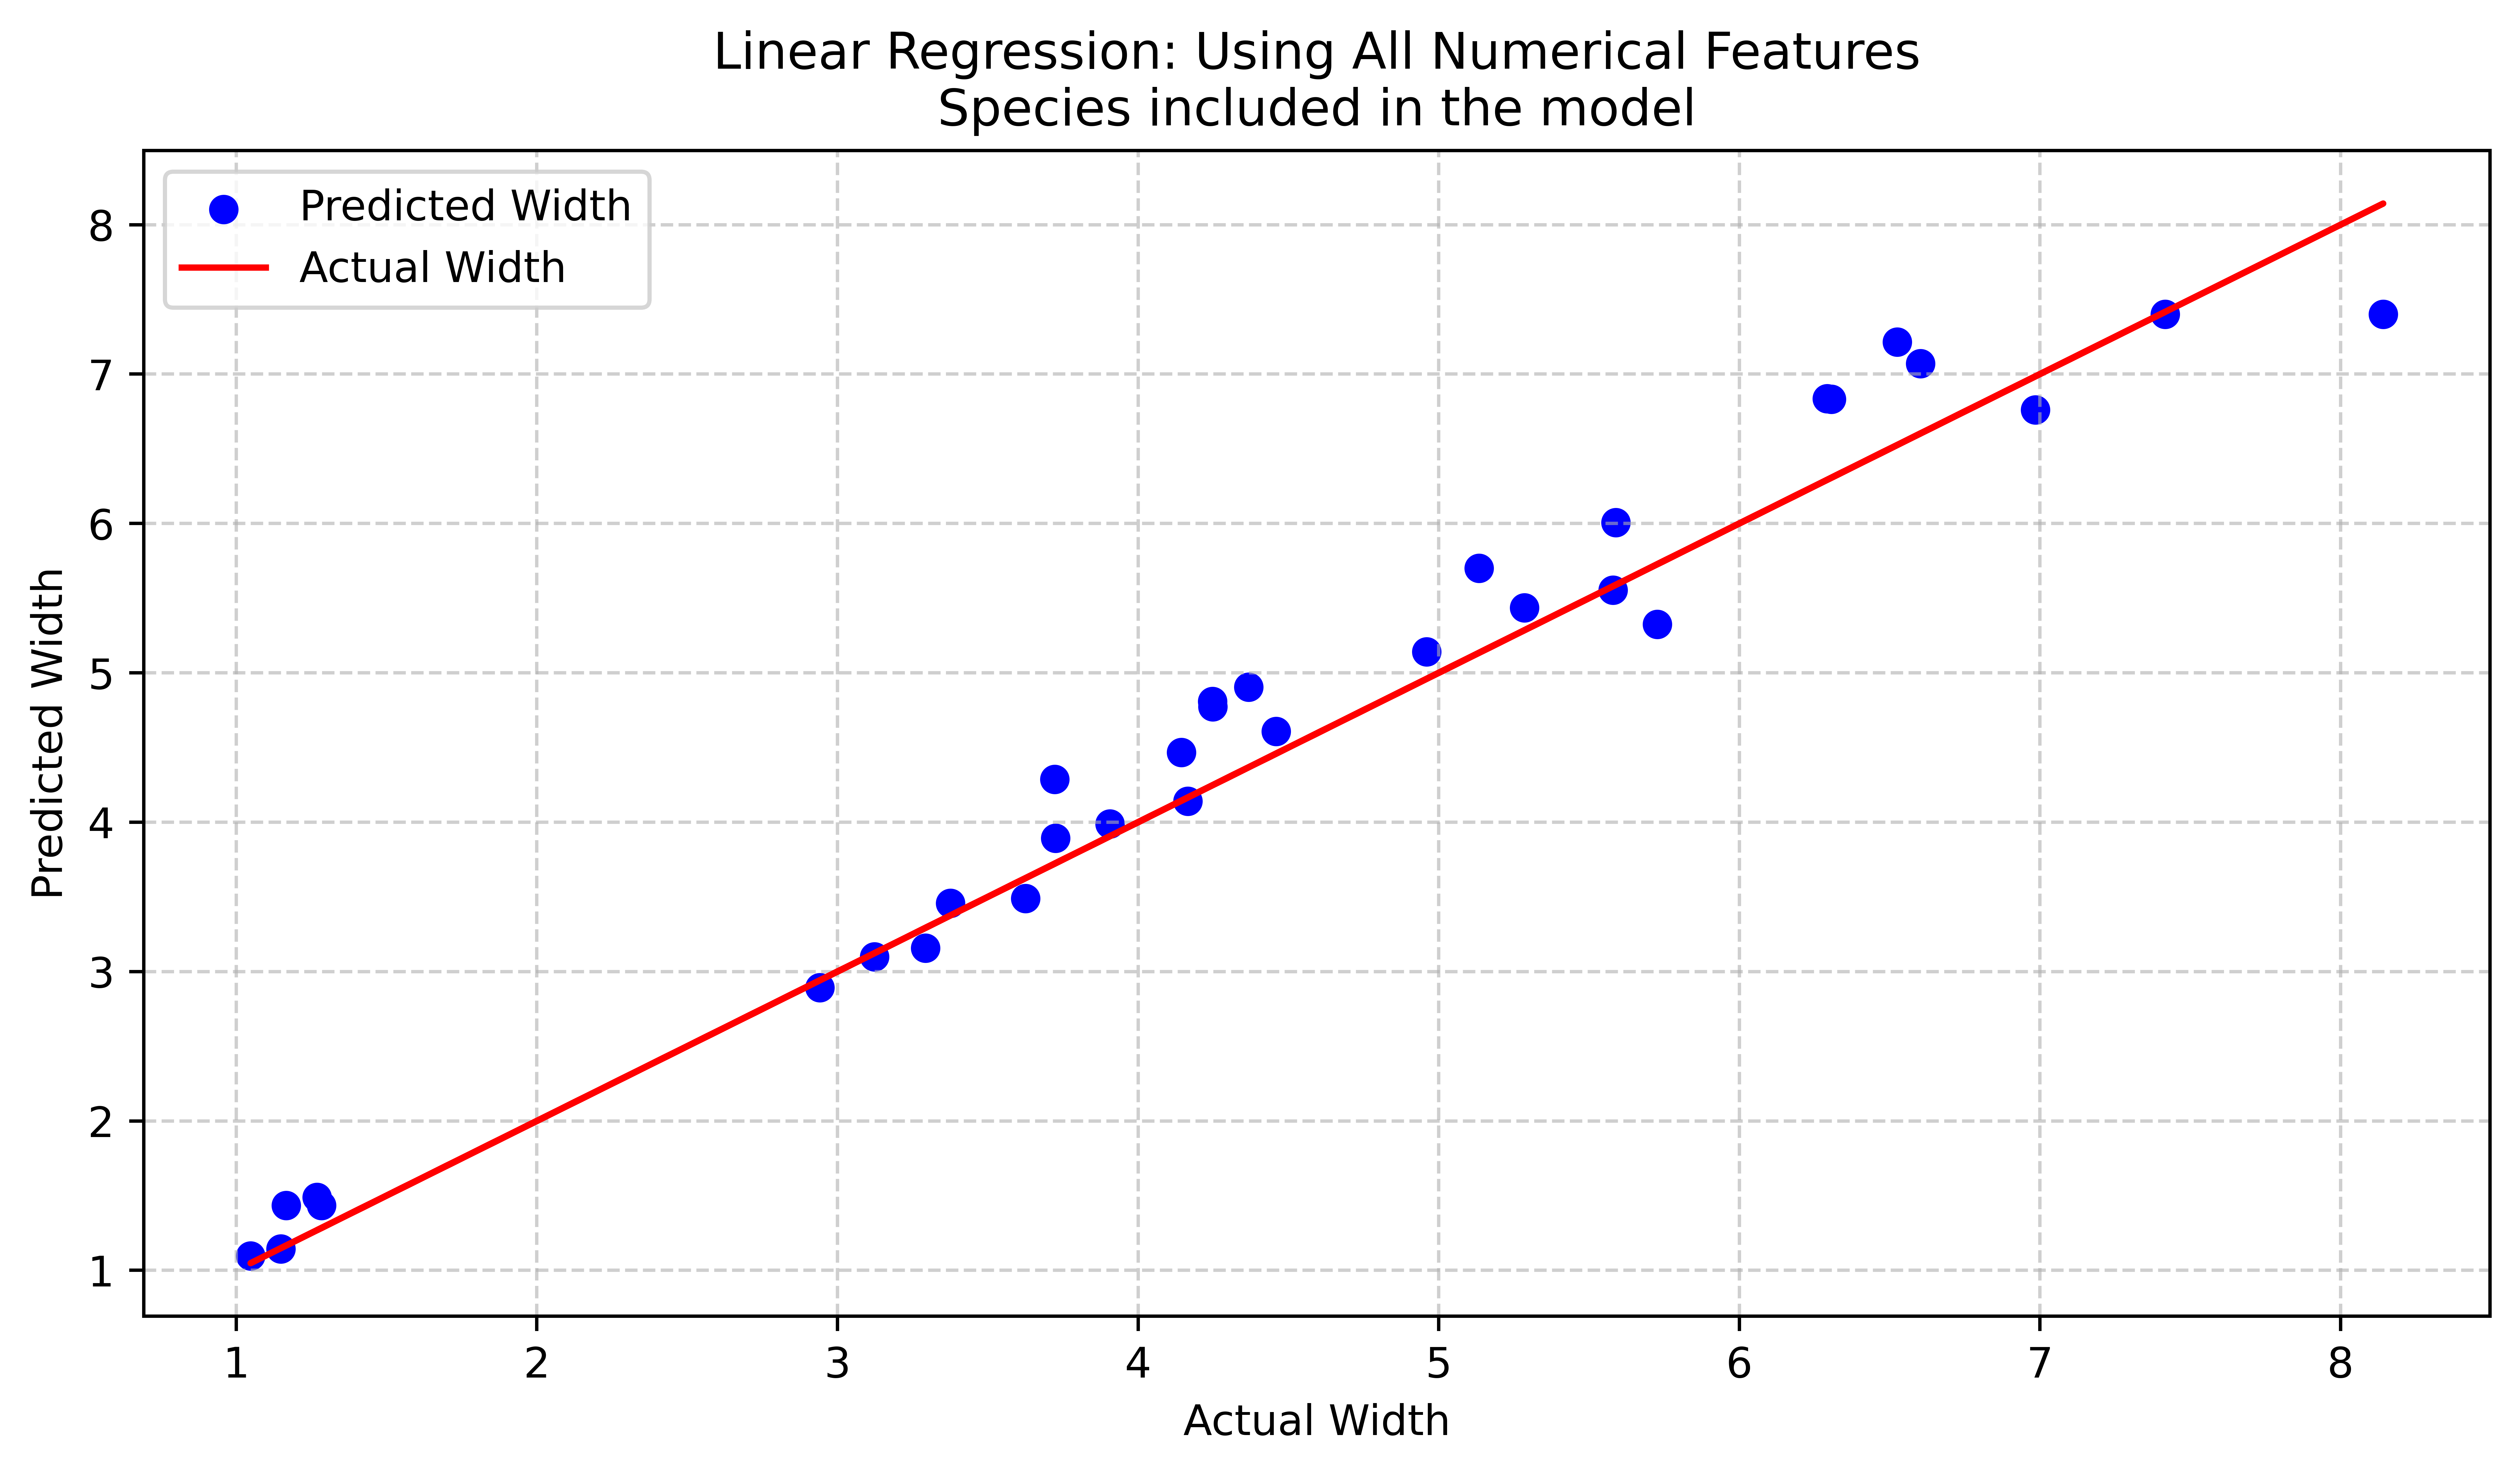

In [25]:
plot_regression(
    y_test, y_pred,
    regression_type='Linear',
    title="Using All Numerical Features\nSpecies included in the model")

### ---

| [$\leftarrow$ Exploratory Analysis ](n0_exploratory_analysis.ipynb) | [Linear Regression 2 $\rightarrow$](n2_linear_regression_2.ipynb) |
| :-----------------------------------------------------------------: | :---------------------------------------------------------------: |
